In [78]:
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.append('/home/ci411/pcen-t-varying/')

from pcen_t.utils import *
from pcen_t.models import MODELS
#import eval_milsed

MODEL_PATH = '/beegfs/ci411/pcen/models/models_122'

URBANSED_CLASSES = ['air_conditioner',
                    'car_horn',
                    'children_playing',
                    'dog_bark',
                    'drilling',
                    'engine_idling',
                    'gun_shot',
                    'jackhammer',
                    'siren',
                    'street_music']

In [25]:
from collections import OrderedDict
from keras.models import model_from_yaml

from pcen_t.utils import * 
from pcen_t.models import MODELS, SqueezeLayer
from pcen_t import pcen_pump
sys.modules['pcen_pump'] = pcen_pump

def compare_results(OUTPUT_PATH, versions, sort=False,
                    is_ensemble=False, results_name='results'):
    results = OrderedDict({})
    params = OrderedDict({})
    n_weights = OrderedDict({})

    # Load pump
    pump = pickle.load(
        open(os.path.join(OUTPUT_PATH, 'pump.pkl'), 'rb'))

    # Load results
    for version in versions:

        # Load results
        resultsfile = os.path.join(OUTPUT_PATH, version, results_name + '.json')
        with open(resultsfile, 'r') as fp:
            results[version] = json.load(fp)

        if is_ensemble:
            n_weights[version] = 'ensemble'
            params[version] = {'modelname': version}
        else:
            # Load params
            #paramsfile = os.path.join(OUTPUT_PATH, version, 'params.json')
            #with open(paramsfile, 'r') as fp:
            #    params[version] = json.load(fp)
            
            modelfile = os.path.join(OUTPUT_PATH, version, 'model.yaml')
            with open(modelfile, 'r') as yaml_file:
                params[version] = yaml_file.read()
            
            # Compute model size
            #HACK ALERT
            model = model_from_yaml(params[version], custom_objects={'SqueezeLayer':SqueezeLayer})
            n_weights[version] = model.count_params()

    # Convert to dataframe
    df = pd.DataFrame(
        columns=['version', 'model', 'n_weights', 's_f1', 's_p', 's_r', 's_e'])
    for k in results.keys():
        r = results[k]
        strong_f = r['overall']['f_measure']
        strong_e = r['overall']['error_rate']
        data = (
            k, 'cnn_l3_strong', n_weights[k],
            strong_f['f_measure'], strong_f['precision'], strong_f['recall'],
            strong_e['error_rate'])
        df.loc[len(df), :] = data

    if sort:
        df = df.sort_values('version')
    return df


In [26]:
models = os.listdir(MODEL_PATH)
results = {}
for model in models:
    path = os.path.join(MODEL_PATH, model)
    if os.path.isdir(path):
        try:
            with open(os.path.join(path, 'results.json'), 'r') as fd:
                result = json.load(fd)
            results[model] = result
        except FileNotFoundError:
            print("No results.json file for model '{}'".format(model))
            results[model] = None


In [27]:
model_list = list(results.keys())
model_list.sort()
print(model_list)

['model122_dry_0', 'model122_dry_01', 'model122_dry_012', 'model122_dry_0123', 'model122_dry_01234', 'model122_dry_012345', 'model122_dry_0123456', 'model122_dry_01234567', 'model122_dry_012345678', 'model122_dry_0123456789', 'model122_dry_1', 'model122_dry_12345678', 'model122_dry_2', 'model122_dry_234567', 'model122_dry_3', 'model122_dry_3456', 'model122_dry_4', 'model122_dry_45', 'model122_dry_5', 'model122_dry_6', 'model122_dry_7', 'model122_dry_8', 'model122_dry_9', 'model122_wet_0', 'model122_wet_01', 'model122_wet_012', 'model122_wet_0123', 'model122_wet_01234', 'model122_wet_012345', 'model122_wet_0123456', 'model122_wet_01234567', 'model122_wet_012345678', 'model122_wet_0123456789', 'model122_wet_1', 'model122_wet_12345678', 'model122_wet_2', 'model122_wet_234567', 'model122_wet_3', 'model122_wet_3456', 'model122_wet_4', 'model122_wet_45', 'model122_wet_5', 'model122_wet_6', 'model122_wet_7', 'model122_wet_8', 'model122_wet_9']


In [28]:
dry_models = [model for model in model_list if "dry" in model]
wet_models = [model for model in model_list if "wet" in model]

In [29]:
compare_results(MODEL_PATH, dry_models, results_name='results_dry')

,version,model,n_weights,s_f1,s_p,s_r,s_e
0,model122_dry_0,cnn_l3_strong,561150,0.47552,0.486538,0.46499,0.743054
1,model122_dry_01,cnn_l3_strong,561298,0.495712,0.459982,0.537461,0.79383
2,model122_dry_012,cnn_l3_strong,561446,0.555562,0.561837,0.549425,0.642906
3,model122_dry_0123,cnn_l3_strong,561594,0.549384,0.568745,0.531298,0.645212
4,model122_dry_01234,cnn_l3_strong,561742,0.556241,0.519876,0.598076,0.703593
5,model122_dry_012345,cnn_l3_strong,561890,0.507894,0.536371,0.482288,0.698584
6,model122_dry_0123456,cnn_l3_strong,562038,0.561632,0.584623,0.54038,0.623914
7,model122_dry_01234567,cnn_l3_strong,562186,0.558365,0.50709,0.621176,0.729756
8,model122_dry_012345678,cnn_l3_strong,562334,0.556907,0.557038,0.556777,0.650402
9,model122_dry_0123456789,cnn_l3_strong,562482,0.521757,0.529521,0.514217,0.687664


In [30]:
compare_results(MODEL_PATH, wet_models, results_name='results_dry')

,version,model,n_weights,s_f1,s_p,s_r,s_e
0,model122_wet_0,cnn_l3_strong,561150,0.286776,0.394262,0.225341,0.898231
1,model122_wet_01,cnn_l3_strong,561298,0.362074,0.448335,0.303651,0.781181
2,model122_wet_012,cnn_l3_strong,561446,0.408059,0.475674,0.357274,0.790191
3,model122_wet_0123,cnn_l3_strong,561594,0.396622,0.429955,0.368085,0.827057
4,model122_wet_01234,cnn_l3_strong,561742,0.40573,0.535448,0.326606,0.731738
5,model122_wet_012345,cnn_l3_strong,561890,0.41779,0.397085,0.440773,0.890338
6,model122_wet_0123456,cnn_l3_strong,562038,0.378552,0.490452,0.308227,0.768388
7,model122_wet_01234567,cnn_l3_strong,562186,0.392392,0.406139,0.379545,0.872932
8,model122_wet_012345678,cnn_l3_strong,562334,0.426622,0.502319,0.370752,0.764784
9,model122_wet_0123456789,cnn_l3_strong,562482,0.367807,0.40875,0.334318,0.811236


In [31]:
results_df = compare_results(MODEL_PATH, model_list, results_name='results')

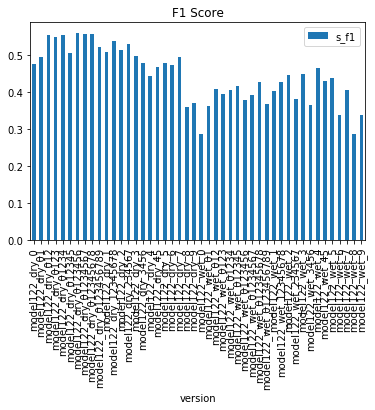

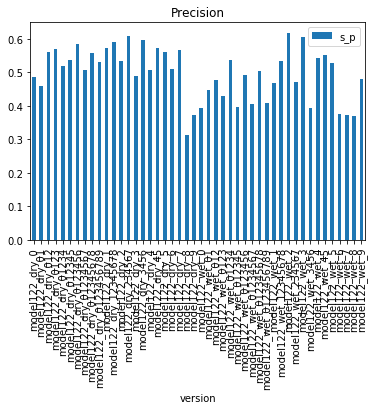

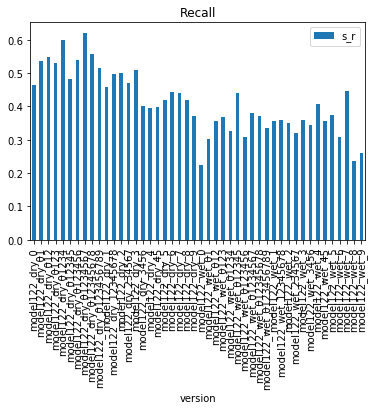

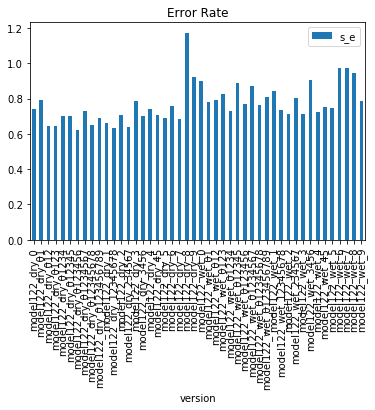

In [24]:
results_df.plot.bar(x='version', y='s_f1', title='F1 Score')
results_df.plot.bar(x='version', y='s_p', title='Precision')
results_df.plot.bar(x='version', y='s_r', title='Recall')
results_df.plot.bar(x='version', y='s_e', title='Error Rate')
plt.show()

In [32]:
def report_results(OUTPUT_PATH, version):
    # Load results
    resultsfolder = os.path.join(OUTPUT_PATH, version)
    resultsfile = os.path.join(resultsfolder, 'results.json')
    with open(resultsfile, 'r') as fp:
        results = json.load(fp)

    # report
    print('{:<10}{}'.format('Model', version))

    print('\nStrong:')
    strong_f = results['overall']['f_measure']
    strong_e = results['overall']['error_rate']
    print('{:<10}{:.3f}'.format('precision', strong_f['precision']))
    print('{:<10}{:.3f}'.format('recall', strong_f['recall']))
    print('{:<10}{:.3f}'.format('f1', strong_f['f_measure']))
    print('{:<10}{:.3f}'.format('e_rate', strong_e['error_rate']))

    print('\n{:<40}P\tR\tF\tE'.format('Strong per-class:'))
    strong_c = results['class_wise']
    c_sorted = [c for c in strong_c.keys()]
    c_sorted = sorted(c_sorted)
    for c in c_sorted:
        r_c = strong_c[c]['f_measure']
        r_ce = strong_c[c]['error_rate']
        print('{:<40}{:.3f}\t{:.3f}\t{:.3f}\t{:.3f}'.format(c, r_c['precision'],
                                                            r_c['recall'],
                                                            r_c['f_measure'],
                                                            r_ce['error_rate']))

    # # Load training history
    # history_file = os.path.join(resultsfolder, 'history.pkl')
    # with open(history_file, 'rb') as fp:
    #     history = pickle.load(fp)

    # Load dynamic history CSV file
    csvfile = os.path.join(resultsfolder, 'history_csvlog.csv')
    history = pd.read_csv(csvfile)

    # Set sns style
    #sns.set()

    print('\nLoss:')

    # Visualize training history
    plt.subplot(1,2,1)
    plt.plot(history['loss'], label='training loss')
    plt.plot(history['val_loss'], label='validation loss')
    plt.axvline(np.argmin(history['val_loss']), color='r')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss: {}'.format(version))
    # plt.grid()
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history['accuracy'], label='training accuracy')
    plt.plot(history['val_accuracy'], label='validation accuracy')
    plt.axvline(np.argmax(history['accuracy']), color='r')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy: {}'.format(version))
    plt.legend()
    plt.tight_layout()

    plt.show()


Model     model122_wet_5

Strong:
precision 0.378
recall    0.188
f1        0.251
e_rate    0.952

Strong per-class:                       P	R	F	E
air_conditioner                         0.242	0.093	0.135	1.199
car_horn                                0.491	0.226	0.310	1.008
children_playing                        0.552	0.113	0.188	0.979
dog_bark                                0.430	0.175	0.249	1.057
drilling                                0.220	0.331	0.264	1.845
engine_idling                           0.358	0.131	0.192	1.104
gun_shot                                0.420	0.192	0.264	1.073
jackhammer                              0.562	0.239	0.335	0.948
siren                                   0.475	0.179	0.260	1.019
street_music                            0.578	0.213	0.311	0.943

Loss:


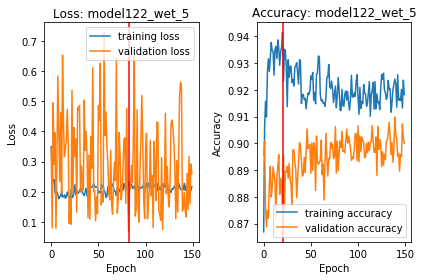

In [35]:
model_name = "model122_wet_5"

resultsfolder = os.path.join(MODEL_PATH, model_name)
resultsfile = os.path.join(resultsfolder, 'results.json')
with open(resultsfile, 'r') as fp:
    results = json.load(fp)
    
csvfile = os.path.join(resultsfolder, 'history_csvlog.csv')
history = pd.read_csv(csvfile)

report_results(MODEL_PATH, model_name)

In [34]:
def compare_results(model_path, dry_model, wet_model):
    # Load results
    dry_folder = os.path.join(model_path, dry_model)
    dry_resultsfile = os.path.join(dry_folder, 'results.json')
    with open(dry_resultsfile, 'r') as fp:
        dry_results = json.load(fp)

    wet_folder = os.path.join(model_path, wet_model)
    wet_resultsfile = os.path.join(wet_folder, 'results.json')
    with open(wet_resultsfile, 'r') as fp:
        wet_results = json.load(fp)
        
    # report
    print('{:<10}\n{}\n{}'.format('Models', dry_model, wet_model))
    
    dry_f = dry_results['overall']['f_measure']
    dry_e = dry_results['overall']['error_rate']
    
    wet_f = wet_results['overall']['f_measure']
    wet_e = wet_results['overall']['error_rate']
    
    keys = ['precision', 'recall', 'f_measure', 'error_rate']
    
    dry_metrics = [dry_f[key] for key in keys[:3]]
    wet_metrics = [wet_f[key] for key in keys[:3]]
    
    dry_metrics.append(dry_e['error_rate'])
    wet_metrics.append(wet_e['error_rate'])

    print('Overall Results:')
    plt.figure()
    x_keys = np.arange(len(keys))
    width_keys = 0.35
    
    plt.title('Overall Result Comparison for {} and {}'.format(dry_model, wet_model))
    plt.bar(x_keys-width_keys/2, dry_metrics, width_keys, label=dry_model)
    plt.bar(x_keys+width_keys/2, wet_metrics, width_keys, label=wet_model)
    plt.xticks(x_keys, keys)
    plt.legend()
    
    print('Per-class results:')
    dry_c = dry_results['class_wise']
    dry_c_metrics = {}

    wet_c = wet_results['class_wise']
    wet_c_metrics = {}

    c_sorted = [c for c in dry_c.keys()]
    c_sorted = sorted(c_sorted)
    
    for key in keys:
        dry_c_metrics[key] = []
        wet_c_metrics[key] = []
        
    for c in c_sorted:
        dry_cr = dry_c[c]['f_measure']
        dry_ce = dry_c[c]['error_rate']
        wet_cr = wet_c[c]['f_measure']
        wet_ce = wet_c[c]['error_rate']
        
        for key in keys:
            if key is not 'error_rate':
                dry_c_metrics[key].append(dry_cr[key])
                wet_c_metrics[key].append(wet_cr[key])
            else:
                dry_c_metrics[key].append(dry_ce[key])
                wet_c_metrics[key].append(wet_ce[key])
    
    for key in keys:
        plt.figure(figsize=(12,5))
        x_c = np.arange(len(c_sorted))
        width_c = 0.35
        plt.title('{} for {} and {}'.format(key, dry_model, wet_model))
        plt.bar(x_c-width_c/2, dry_c_metrics[key], width_c, label=dry_model)
        plt.bar(x_c+width_c/2, wet_c_metrics[key], width_c, label=wet_model)
        plt.xticks(x_c ,c_sorted)
        plt.legend()
    

    plt.show()

Models    
model122_wet_5
model122_wet_0123456789
Overall Results:
Per-class results:


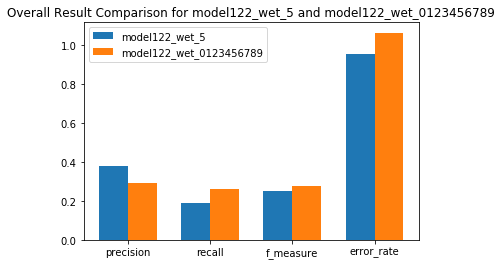

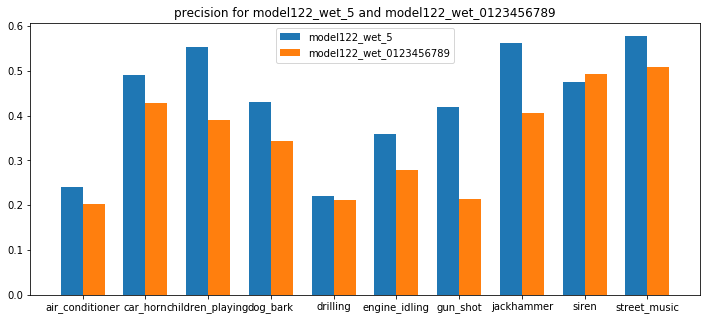

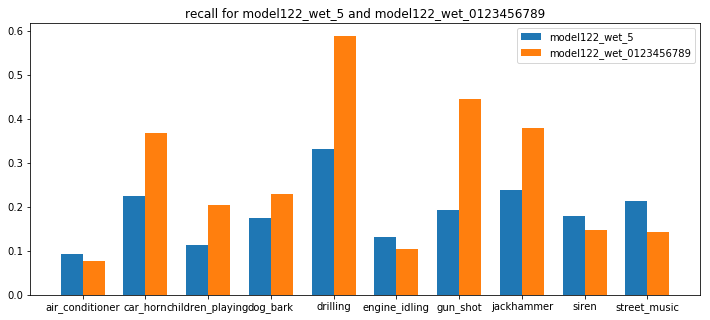

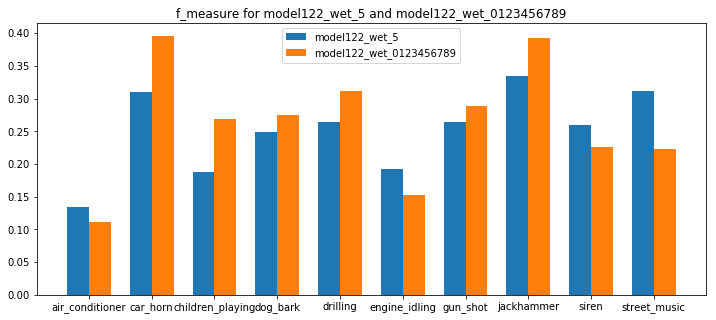

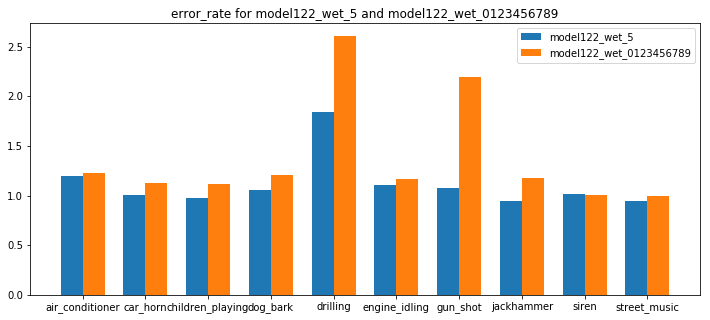

In [22]:
compare_results(MODEL_PATH, "model122_wet_5", "model122_wet_0123456789")

In [17]:
def extract_slices(models):
    return [[int(single_slice) for single_slice in slices.split('_')[2]] for slices in models]

In [75]:
def results_to_df(OUTPUT_PATH, versions, sort=False,
                    is_ensemble=False, results_name='results'):
    results = OrderedDict({})
    params = OrderedDict({})
    n_weights = OrderedDict({})

    # Load pump
    pump = pickle.load(
        open(os.path.join(OUTPUT_PATH, 'pump.pkl'), 'rb'))

    # Load results
    for version in versions:

        # Load overall results
        resultsfile = os.path.join(OUTPUT_PATH, version, results_name + '.json')
        with open(resultsfile, 'r') as fp:
            results[version] = json.load(fp)

        if is_ensemble:
            n_weights[version] = 'ensemble'
            params[version] = {'modelname': version}
        else:
            modelfile = os.path.join(OUTPUT_PATH, version, 'model.yaml')
            with open(modelfile, 'r') as yaml_file:
                params[version] = yaml_file.read()
            
            # Compute model size
            #HACK ALERT
            model = model_from_yaml(params[version], custom_objects={'SqueezeLayer':SqueezeLayer})
            n_weights[version] = model.count_params()
        
    # Convert to dataframe
    classes = results[list(results.keys())[0]]['class_wise'].keys()
    classes = sorted(classes)
    
    metrics =  ['precision', 'recall', 'f_measure', 'error_rate']
    metric_map = {'precision':'_p', 'recall':'_r', 'f_measure':'_f1', 'error_rate':'_e'}
    
    columns = ['version', 'model', 'n_weights',  'overall_p', 'overall_r', 'overall_f1', 'overall_e']
    for c in classes:
        for m in metrics:
            columns.append(c+metric_map[m])
    
    df = pd.DataFrame(columns=columns, dtype=float)
    
    for k in results.keys():
        r = results[k]
        strong_f = r['overall']['f_measure']
        strong_e = r['overall']['error_rate']
        strong_c = r['class_wise']
        data = [
            k, 'cnn_l3_strong', n_weights[k],
            strong_f['precision'], strong_f['recall'],
            strong_f['f_measure'], strong_e['error_rate']]
        for c in classes:
            for m in metrics:
                if m is not 'error_rate':
                    data.append(strong_c[c]['f_measure'][m])
                else:
                    data.append(strong_c[c]['error_rate'][m])
        df.loc[len(df), :] = tuple(data)

    columns.insert(1, 'training_set')
    columns.insert(2, 'slices')
    df['training_set'] = df['version'].map(lambda x : x.split('_')[1])
    df['slices'] = df['version'].map(lambda x : set(x.split('_')[2]))
    df = df[columns]
        
    if sort:
        df = df.sort_values('version')
    return df

total_results = results_to_df(MODEL_PATH, model_list)

In [82]:
total_results

,version,training_set,slices,model,n_weights,overall_p,overall_r,overall_f1,overall_e,air_conditioner_p,...,jackhammer_f1,jackhammer_e,siren_p,siren_r,siren_f1,siren_e,street_music_p,street_music_r,street_music_f1,street_music_e
0,model122_dry_0,dry,{0},cnn_l3_strong,561150.0,0.220404,0.254632,0.236285,1.271735,0.347974,...,0.167408,1.474754,0.407768,0.320934,0.359177,1.145182,0.189794,0.521084,0.278243,2.703363
1,model122_dry_01,dry,"{1, 0}",cnn_l3_strong,561298.0,0.197697,0.359506,0.255107,1.585845,0.174843,...,0.147791,0.961949,0.367879,0.258112,0.303372,1.185398,0.162319,0.783484,0.268924,4.259839
2,model122_dry_012,dry,"{2, 1, 0}",cnn_l3_strong,561446.0,0.246001,0.260467,0.253027,1.135118,0.211341,...,0.199939,0.945101,0.542003,0.175851,0.265546,0.972744,0.220158,0.463956,0.298615,2.179468
3,model122_dry_0123,dry,"{2, 3, 1, 0}",cnn_l3_strong,561594.0,0.269285,0.231430,0.248927,1.065480,0.219463,...,0.190528,0.930327,0.285768,0.449743,0.349477,1.674317,0.300827,0.240964,0.267588,1.319076
4,model122_dry_01234,dry,"{1, 0, 2, 3, 4}",cnn_l3_strong,561742.0,0.232225,0.359917,0.282303,1.366220,0.181278,...,0.232358,1.157750,0.472222,0.396913,0.431305,1.046696,0.226837,0.482530,0.308601,2.162149
5,model122_dry_012345,dry,"{1, 0, 5, 2, 3, 4}",cnn_l3_strong,561890.0,0.242842,0.231669,0.237124,1.124490,0.130671,...,0.194581,1.072473,0.623143,0.168085,0.264755,0.933567,0.331126,0.218373,0.263182,1.222741
6,model122_dry_0123456,dry,"{1, 0, 5, 2, 3, 4, 6}",cnn_l3_strong,562038.0,0.251071,0.236666,0.243656,1.105592,0.366769,...,0.201510,1.009020,0.675265,0.246043,0.360670,0.872279,0.332290,0.303715,0.317360,1.306576
7,model122_dry_01234567,dry,"{1, 0, 5, 7, 2, 3, 4, 6}",cnn_l3_strong,562186.0,0.260465,0.306018,0.281410,1.124719,0.355943,...,0.224977,1.293313,0.321660,0.492976,0.389304,1.546646,0.318338,0.316867,0.317601,1.361647
8,model122_dry_012345678,dry,"{1, 0, 5, 8, 7, 2, 3, 4, 6}",cnn_l3_strong,562334.0,0.251148,0.266775,0.258725,1.115189,0.188257,...,0.203422,0.955728,0.475094,0.244856,0.323160,1.025673,0.260548,0.453865,0.331051,1.834237
9,model122_dry_0123456789,dry,"{9, 1, 0, 5, 8, 7, 2, 3, 4, 6}",cnn_l3_strong,562482.0,0.247542,0.269143,0.257891,1.135295,0.298716,...,0.151717,1.016796,0.580301,0.263455,0.362387,0.927087,0.280602,0.419578,0.336297,1.656124


In [77]:
total_results.to_csv('/beegfs/ci411/pcen/models/models_122/models_122_results.csv')

In [178]:
def compare_results_df(df, models, metric='overall', classes=URBANSED_CLASSES):
    n_models = len(models)
    data = []
    metric_dict = {'f1':'F1-Score', 'p':'Precision', 'r':'Recall', 'e':'Error Rate', 'overall':'Overall'}
    
    if metric=='overall':
        metrics_short = ['f1', 'p', 'r', 'e']
        columns = ['overall_'+m for m in metrics_short]
        labels = [metric_dict[l] for l in metrics_short]
        n_bars = 4
    else:
        columns = [c+'_'+metric for c in classes]
        n_bars = len(classes)
        labels = classes
    
    plt.figure(figsize=(16,10))
    plt.title("{} Comparison Results".format(metric_dict[metric]))
    x = np.arange(n_bars)
    full_width = (n_models/10)+.1
    width = full_width/(n_models-1)
    for i, model in enumerate(models):
        model_idx = df['version']==model
        results= df[model_idx][columns].values.tolist()[0]
        plt.bar(x-(full_width/2.)+(width*i), results, width, label=model)
    
    plt.xticks(x, labels)
    plt.legend()
    plt.show()

    
    

    



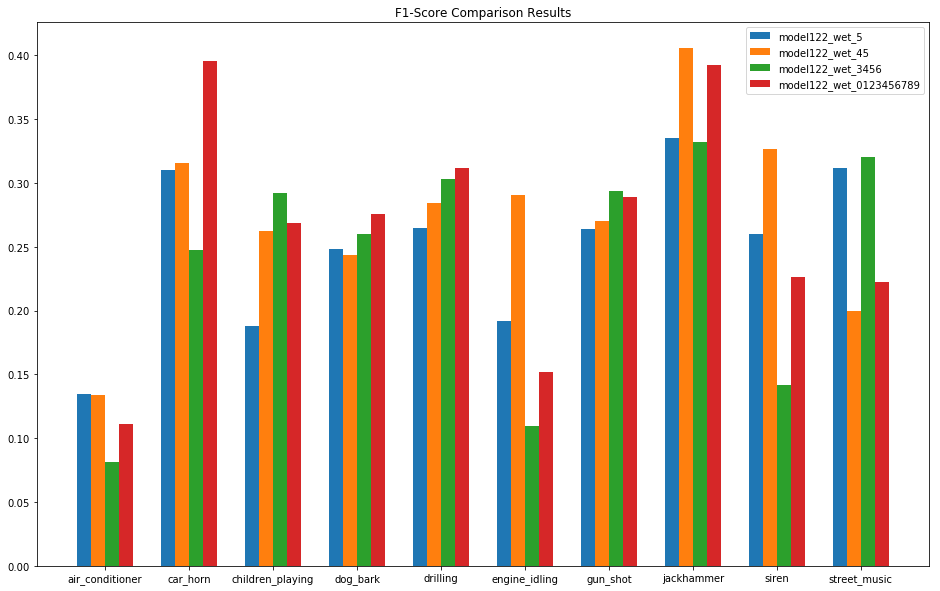

In [181]:
compare_results_df(total_results, ['model122_wet_5','model122_wet_45', 'model122_wet_3456', 'model122_wet_0123456789'], metric='f1')